## PROJEKT 2: Algorytm Genetyczny 

### Problem komiwojażera:

 - czyli Traveling Salesman Problem to klasyczne zagadnienie optymalizacyjne w matematyce i informatyce. Polega na tym, aby znaleźć najkrótszą trasę łączącą zbiór miast, przy czym każde miasto ma zostać odwiedzone tylko raz i komiwojażer ma wrócić do punktu wyjścia. 

In [40]:
# jaki robimy podział 
#  - funkcje pomocnicze
#  - algorytm jako tez funkcja uzywajaca tych pomocniczych
# czyli zrobimy w visual studio code plik alg_gen_funkcje_pomocnicze.py i załaczymy go tutaj


In [41]:
import alg_gen_funkcje_pomocnicze as f
import matplotlib.pyplot as plt
from IPython.display import clear_output
import math
import random

In [42]:
# ================================ PARAMETRY ======================
number_of_cities = 20 #ustawimy do 50
number_of_generations = 200 # tyle razy wykonujemy pętlę dla pokolenia
population_size = 3000 # 100 osobnikow w jednej generacji
mutation_probability = 0.05



In [43]:
n = 30
center_x = 150
center_y = 150
radius = 90
cities_list = []
# Generowanie miast
for i in range(n):
    angle = 2 * math.pi * i / n  # Kąt w radianach
    x = center_x + radius * math.cos(angle)
    y = center_y + radius * math.sin(angle)
    cities_list.append(f.City(i + 1, x, y)) 

random.shuffle(cities_list)

In [44]:
# 1 losowo wybieramy polozenie miast:
#cities_list = f.generate_cities(number_of_cities)
# zmiany do wykonania:
# - drugi najlepszy zeby sie wyswietlal

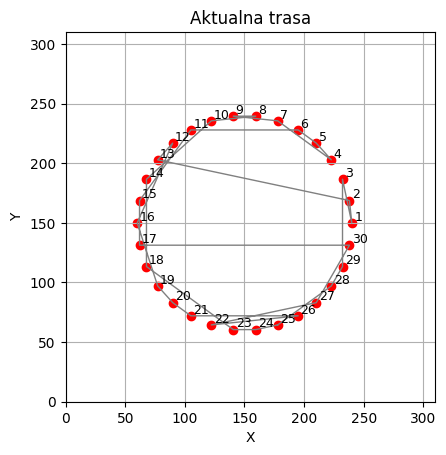

Najlepsza znaleziona ścieżka: 1700.12


In [45]:

population = f.generate_population(cities_list, population_size) # generujemy populacje początkową

# OCENA 1 populacji
fitness_f=[f.fitness_function(chromosom) for chromosom in population]
best_dist = min(fitness_f) 
best_index = fitness_f.index(best_dist) 
probabilities = [best_dist/x for x in fitness_f]

# najlepsze rozwiązanie w tym pokoleniu
best_res = population[best_index]
f.vizualize(best_res)

nr_gen = 1
no_change = 0
while nr_gen < number_of_generations and no_change<80:
    population = f.generate_new_population(population, population_size, probabilities, mutation_probability) # wykonuje nam crossover i mutation
    
    fitness_f=[f.fitness_function(chromosom) for chromosom in population]
    new_best_dist = min(fitness_f) # najlepszy w tym pokoleniu
    new_best_index = fitness_f.index(new_best_dist) 
    new_best_res = population[new_best_index]
    probabilities = [new_best_dist / x for x in fitness_f]
    if new_best_dist < best_dist:
        best_dist = new_best_dist
        best_res = new_best_res
        no_change=0
    else: 
        no_change +=1
    f.vizualize(best_res)
    nr_gen +=1


print("Najlepsza znaleziona ścieżka: {:.2f}".format(best_dist))
